In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().values.any()

False

In [11]:
df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [12]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

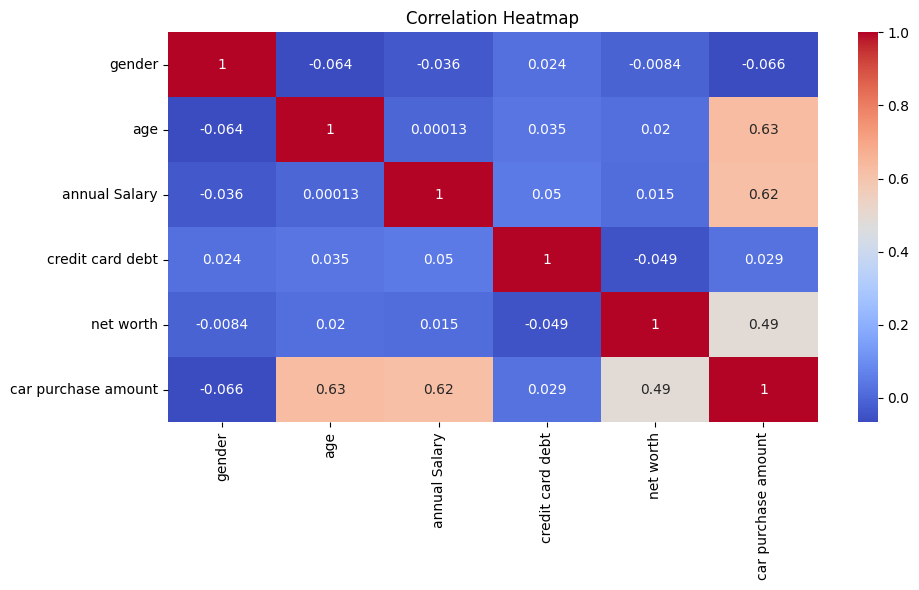

In [13]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

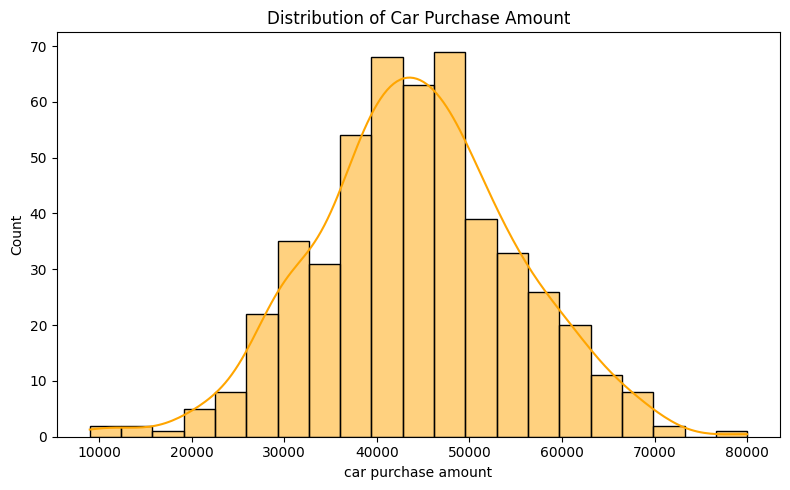

In [14]:
# 6. Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df['car purchase amount'], kde=True, color='orange')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel('car purchase amount')
plt.tight_layout()
plt.show()

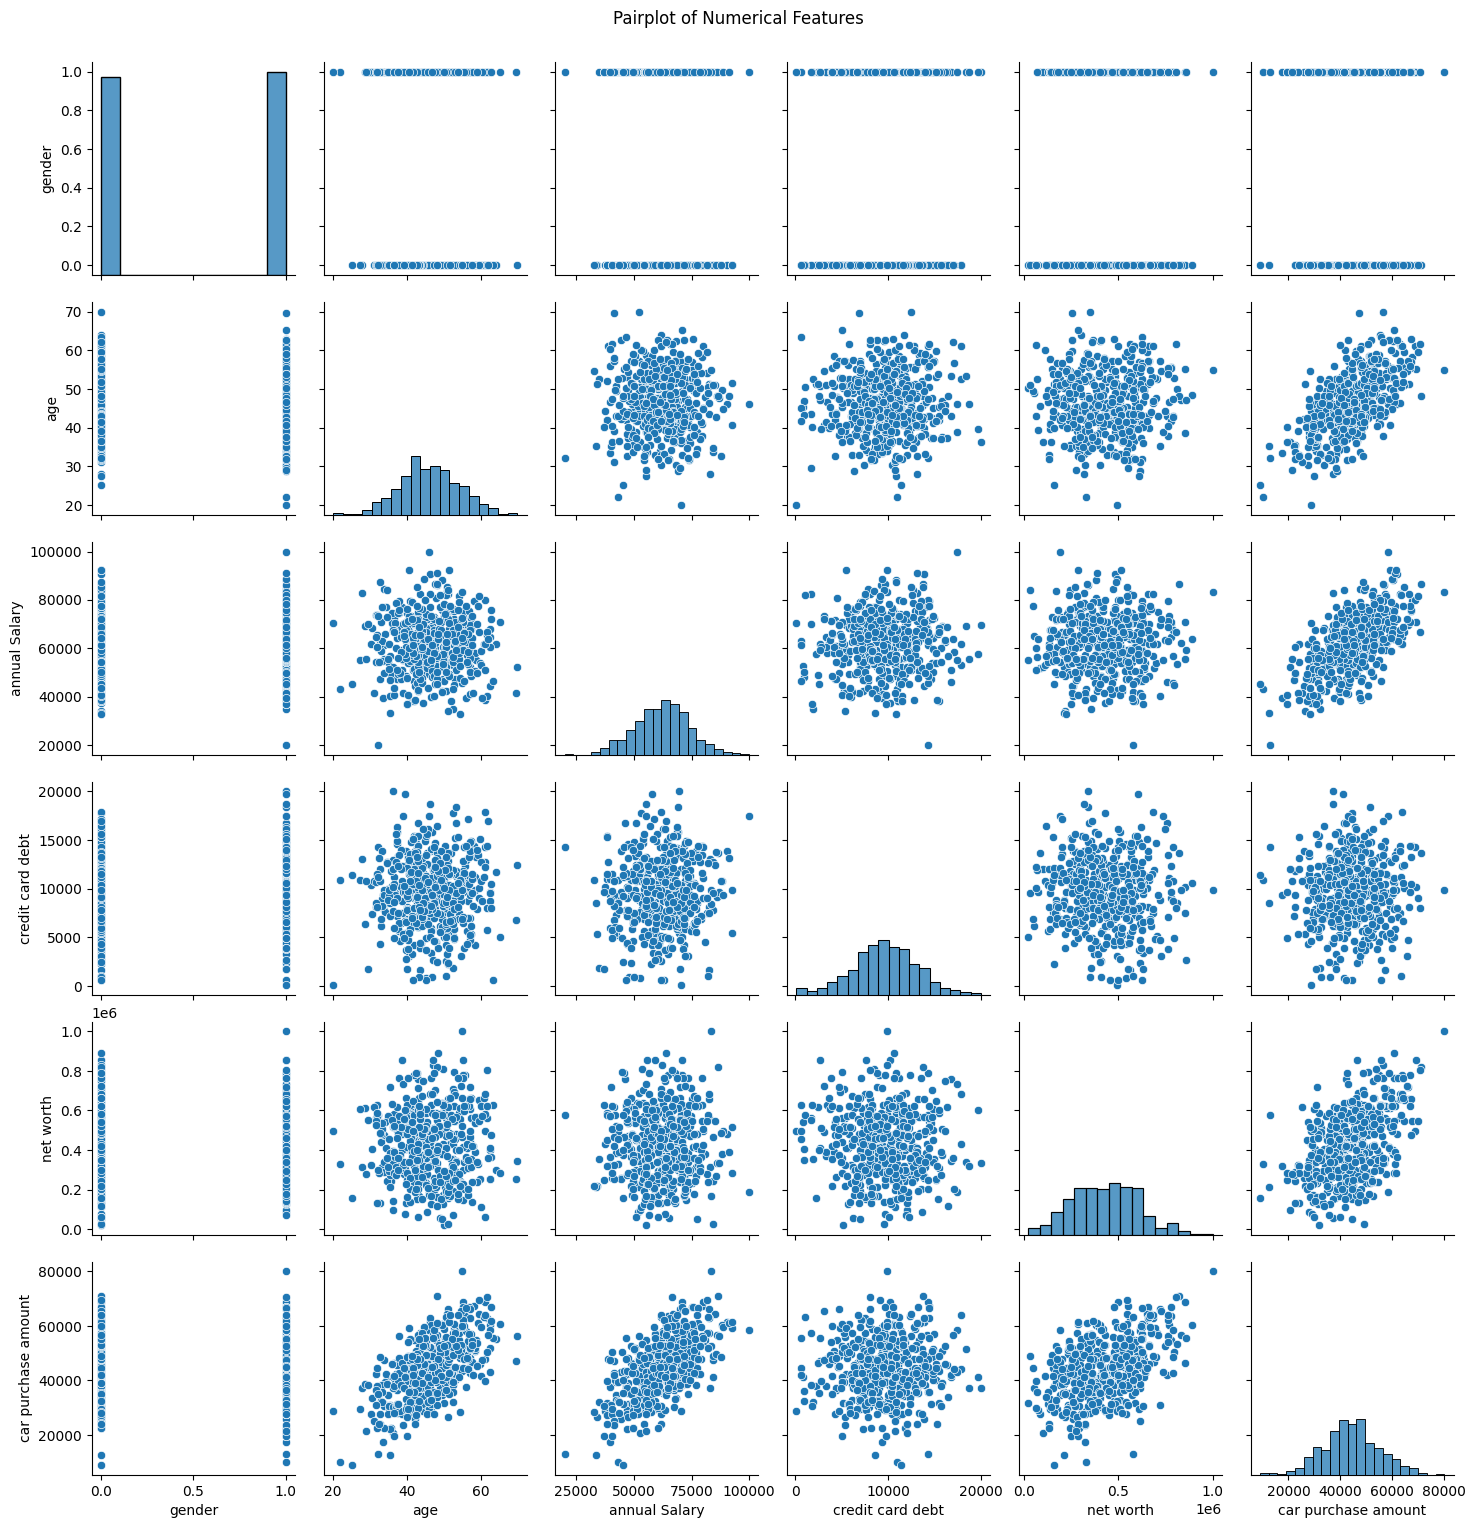

In [15]:
# 7. Pairplot for Numerical Relationships
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

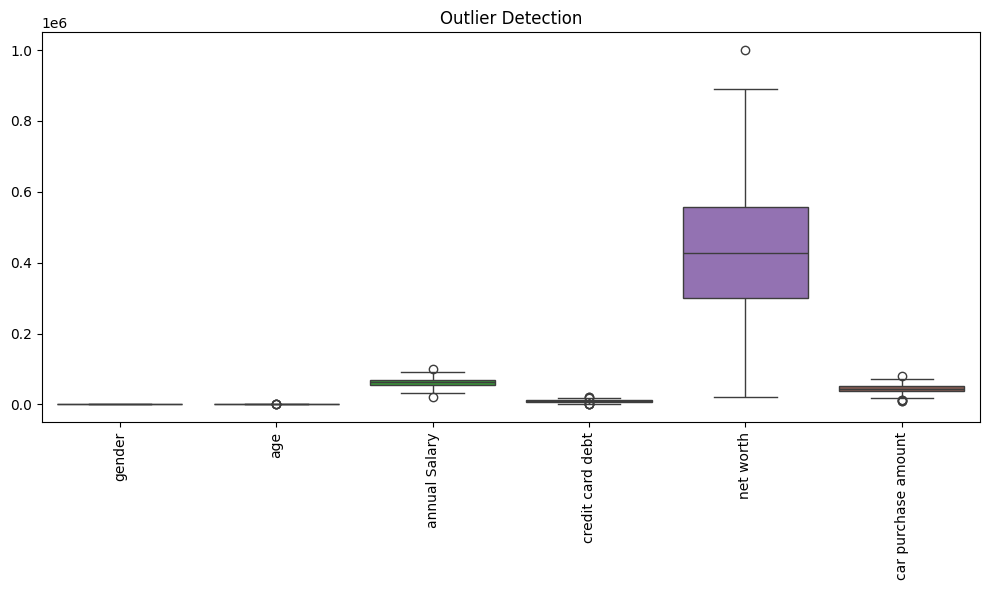

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Outlier Detection")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
df.columns


Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
# 1. Drop text columns
X=df.drop(columns=['car purchase amount','customer name', 'customer e-mail', 'country'])
# 2. Target variable
y=df['car purchase amount']
# 3. Now scale numeric features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [21]:
# 12. Train Models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [22]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [23]:
# Linear Regression Evaluation
print("\nLinear Regression Evaluation:")
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"R2 Score: {lr_r2:.2f}")
print(f"RMSE: {lr_rmse:.2f}")


Linear Regression Evaluation:
R2 Score: 1.00
RMSE: 1.45


In [24]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"R2 Score: {rf_r2:.2f}")
print(f"RMSE: {rf_rmse:.2f}")


Random Forest Evaluation:
R2 Score: 0.95
RMSE: 2326.70


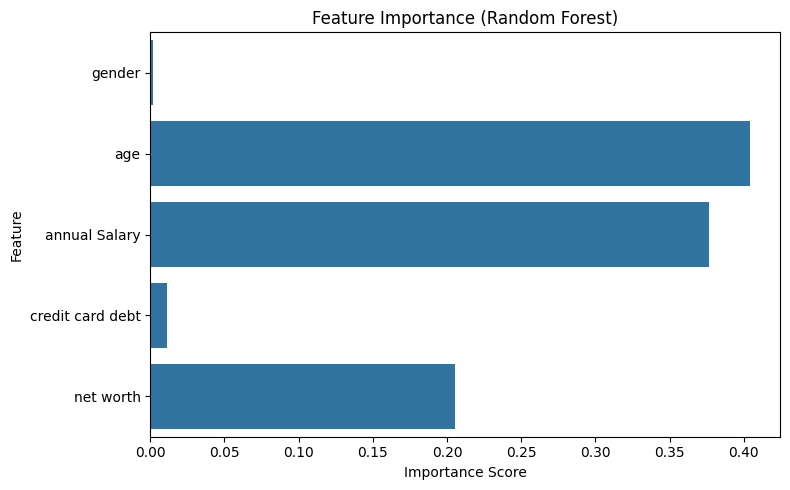

In [25]:

# Feature importance plot
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

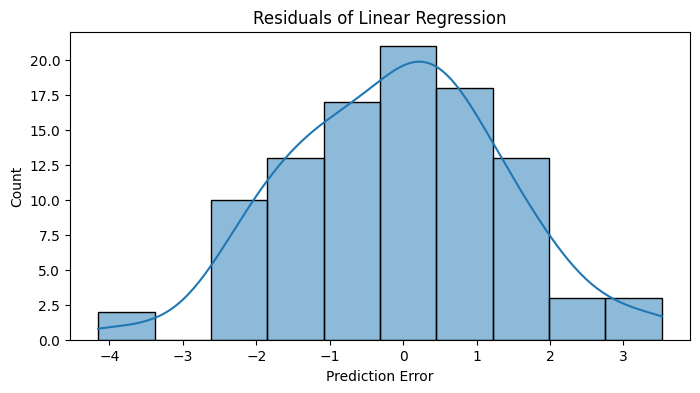

In [26]:
#Check Residuals (Error Distribution)
residuals = y_test - lr_preds
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals of Linear Regression")
plt.xlabel("Prediction Error")
plt.show()

In [27]:
#linear regression copmparision
comparison_df = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': lr_preds[:10]
})
print(comparison_df)

        Actual     Predicted
0  46082.80993  46084.577864
1  45058.89690  45060.424126
2  63079.84329  63081.568261
3  31837.22537  31838.294520
4  60461.24268  60460.967913
5  63140.05082  63138.105866
6  52477.83479  52479.979477
7  54755.42038  54757.761309
8  52707.96816  52706.993381
9  47869.82593  47869.367910


In [28]:
#random forest comparision
comparison_rf = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': rf_preds[:10]
})
print(comparison_rf)

        Actual     Predicted
0  46082.80993  46306.677500
1  45058.89690  45054.455460
2  63079.84329  64552.064503
3  31837.22537  35575.101414
4  60461.24268  58508.837952
5  63140.05082  60505.645252
6  52477.83479  52058.905629
7  54755.42038  54564.075305
8  52707.96816  50518.292099
9  47869.82593  47808.352979


In [29]:
# Predict on New Data (Simulation) using random forest

# Example new data: [gender, age, annual salary, credit card debt, net worth]
new_customer = np.array([[1, 45.0, 60000.0, 8000.0, 500000.0]])  # shape: (1, 5)
new_customer_scaled = scaler.transform(new_customer)
predicted_amount = rf.predict(new_customer_scaled)

print(f"Predicted Car Purchase Amount: ${predicted_amount[0]:,.2f}")

Predicted Car Purchase Amount: $43,965.64


In [30]:
# Predict on New Data (Simulation) using linear regression

# Example new data: [gender, age, annual salary, credit card debt, net worth]
new_customer = np.array([[1, 45.0, 60000.0, 8000.0, 500000.0]])  # shape: (1, 5)
new_customer_scaled = scaler.transform(new_customer)
predicted_amount = lr.predict(new_customer_scaled)

print(f"Predicted Car Purchase Amount: ${predicted_amount[0]:,.2f}")

Predicted Car Purchase Amount: $43,954.70


In [31]:
from sklearn.metrics import mean_absolute_percentage_error

# Linear Regression
lr_mape = mean_absolute_percentage_error(y_test, lr_preds) * 100
lr_accuracy = 100 - lr_mape
print(f"Linear Regression Accuracy~~{lr_accuracy:.2f}%")

Linear Regression Accuracy~~100.00%


In [32]:

# Random Forest
rf_mape = mean_absolute_percentage_error(y_test, rf_preds)*100
rf_accuracy = 100 - rf_mape
print(f"Random Forest Accuracy~~{rf_accuracy:.2f}%")

Random Forest Accuracy~~96.38%


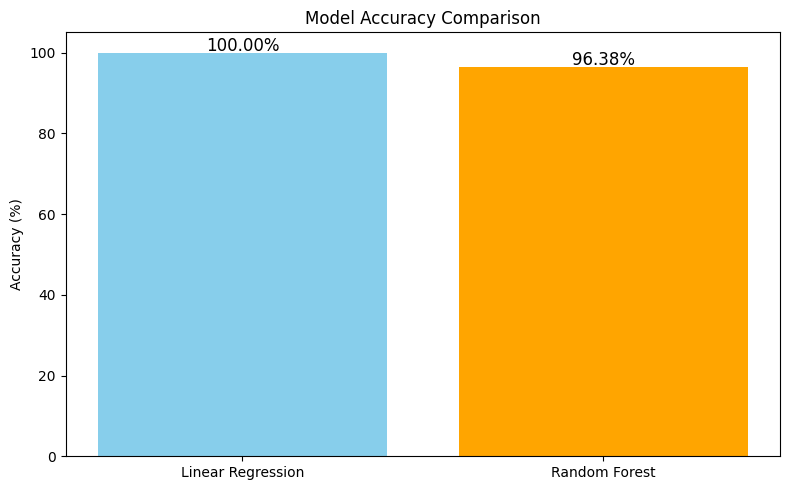

In [33]:

# Model names and their accuracies
models=['Linear Regression', 'Random Forest']
accuracies=[lr_accuracy, rf_accuracy]

# Plotting
plt.figure(figsize=(8, 5))
bars=plt.bar(models, accuracies,color=['skyblue', 'orange'])

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', fontsize=12)

plt.ylim(0, 105)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

In [35]:
import joblib

# Assuming your trained model is called 'lr_model' or 'rf_model'
joblib.dump(lr, "sales_model.pkl")


['sales_model.pkl']